# EDA Salaries and Demographics

# EDA Salarios y Demografía

Next we import the libraries to use and the data set is loaded.

A continuación importamos las librerías a utilizar y se carga el set de datos.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [23]:
df = pd.read_excel(r"C:\Users\Sagith Amin\Portafolio Data Science y Machine Learning\datasalary.xlsx")
df.head()

,EEID,Full_Name,Job_Title,ID_Department,ID_BusinessUnit,Gender,Ethnicity,Age,Hire_Date,Annual_Salary,Bonus,Country,City,Exit_Date,Hire_Year,Hire_Month,Hired_timeyears,Age_group,BusinessUnit,Department
0,E02387,Emily Davis,Sr. Manger,10,C45,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,2016,April,5.526027,55-60,Research & Development,IT
1,E04105,Theodore Dinh,Technical Architect,10,D78,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT,1997,November,25.309589,60-65,Manufacturing,IT
2,E02572,Luna Sanders,Director,44,E44,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT,2006,October,16.397260,50-55,Speciality Products,Finance
3,E02832,Penelope Jordan,Computer Systems Manager,10,D78,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT,2019,September,3.468493,60-65,Manufacturing,IT
4,E01639,Austin Vo,Sr. Analyst,44,D78,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT,1995,November,27.336986,55-60,Manufacturing,Finance


Here we analyze the type of data we have in the dataset.

Aqui se analizan el tipo de datos que tenemos en el dataset.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   EEID             1000 non-null   object        
 1   Full_Name        1000 non-null   object        
 2   Job_Title        1000 non-null   object        
 3   ID_Department    1000 non-null   int64         
 4   ID_BusinessUnit  1000 non-null   object        
 5   Gender           1000 non-null   object        
 6   Ethnicity        1000 non-null   object        
 7   Age              1000 non-null   int64         
 8   Hire_Date        1000 non-null   datetime64[ns]
 9   Annual_Salary    1000 non-null   int64         
 10  Bonus            1000 non-null   float64       
 11  Country          1000 non-null   object        
 12  City             1000 non-null   object        
 13  Exit_Date        85 non-null     datetime64[ns]
 14  Hire_Year        1000 non-null   int64   

It can be seen that the Hire_Year column is of type int, however it is not a continuous variable but a categorical one since the years would not have arithmetic calculations between them.

Se puede evidenciar que la columna Hire_Year es de tipo int, sin embargo no es una variable continua sino categorica pues los años no tendrian calculos aritmeticos entre si.

In [25]:
df['Hire_Year'] = df['Hire_Year'].astype('object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   EEID             1000 non-null   object        
 1   Full_Name        1000 non-null   object        
 2   Job_Title        1000 non-null   object        
 3   ID_Department    1000 non-null   int64         
 4   ID_BusinessUnit  1000 non-null   object        
 5   Gender           1000 non-null   object        
 6   Ethnicity        1000 non-null   object        
 7   Age              1000 non-null   int64         
 8   Hire_Date        1000 non-null   datetime64[ns]
 9   Annual_Salary    1000 non-null   int64         
 10  Bonus            1000 non-null   float64       
 11  Country          1000 non-null   object        
 12  City             1000 non-null   object        
 13  Exit_Date        85 non-null     datetime64[ns]
 14  Hire_Year        1000 non-null   object  

A first approach to the continuous variables is made, there is an average age of 45 to 54 years of age and an average of 8 years of work while in the 75th percentile it can be seen that they reach 15 years.

Se realiza un primer acercamiento a las variables continuas, hay una edad media de 45 a 54 años de edad y una media de 8 años de trabajo mientras que en el percentil 75 se puede ver que alcanzan los 15 años.

In [27]:
df.describe()

,ID_Department,Age,Annual_Salary,Bonus,Hired_timeyears
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,200.49200,44.382000,113217.365000,0.088660,10.403611
std,277.28457,11.246981,53545.985644,0.117856,7.527560
min,10.00000,25.000000,40063.000000,0.000000,0.041096
25%,15.00000,35.000000,71430.250000,0.000000,4.162329
50%,68.00000,45.000000,96557.000000,0.000000,8.606849
75%,415.00000,54.000000,150782.250000,0.150000,15.550685
max,774.00000,65.000000,258498.000000,0.400000,31.202740


C:\Users\Sagith Amin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


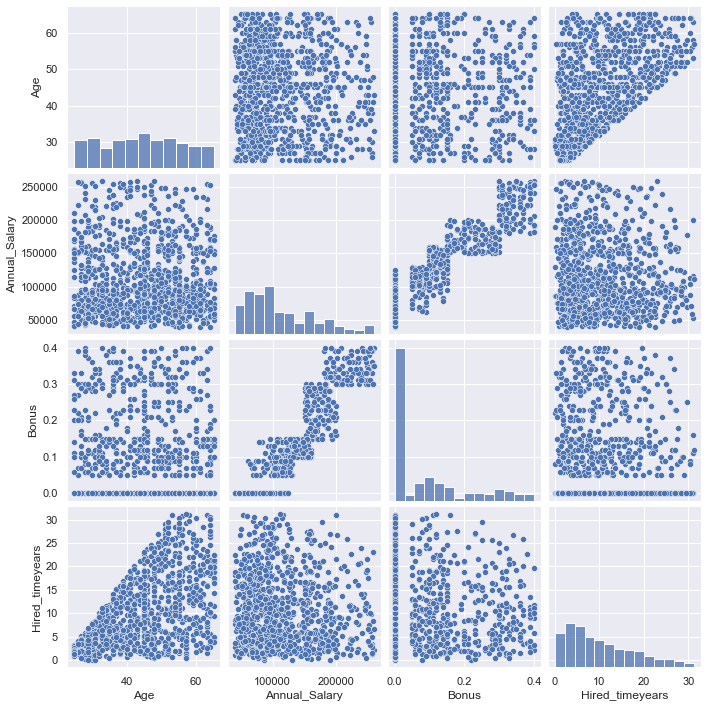

In [28]:
sns.set()
cols = ['Age', 'Annual_Salary', 'Bonus', 'Hired_timeyears']
sns.pairplot(df[cols], size = 2.5)
plt.show()

Here a correlation matrix is made and effectively the higher the annual salary, the higher the bonus, its correlation is 93%.

Aqui se realizar una matriz de correlación y efectivamente mientras mayor es el salario anual, mayor es el bono, su correlación es del 93%.

<AxesSubplot:>

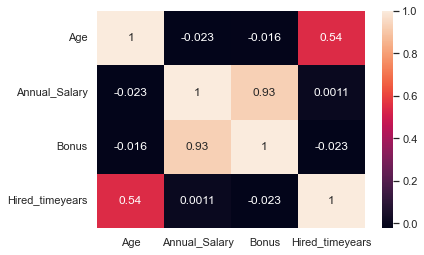

In [29]:
subset = df[['Age', 'Annual_Salary', 'Bonus', 'Hired_timeyears']]

sns.heatmap(subset.corr(), annot=True)

In this box and whisker graph you can see the percentiles by department, IT and Engineering have many outliers well above their averages.

En este grafico de caja y bigotes se puede apreciar los percentiles por departamento, IT e Engineering tienen muchos outliers muy por encima de sus medias.

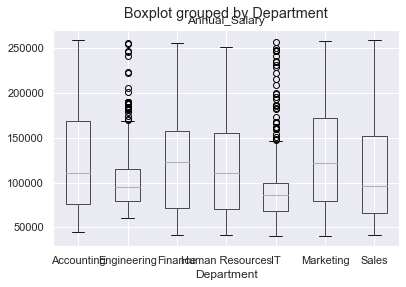

In [60]:
df.boxplot(column='Annual_Salary', by='Department')
plt.show()

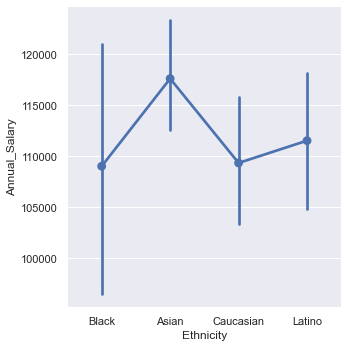

In [40]:
sns.catplot(x='Ethnicity', y='Annual_Salary', data=df, kind='point')

Here you can see how Asians have a certain tendency towards management roles such as Directors, Managers, Sr. Manager and Vice President.

Aqui se puede ver como los asiaticos tienen cierta tendencia por roles de dirección como Directores, Managers, Sr. manager y Vicepresident.

In [45]:
table = pd.crosstab(df['Job_Title'], df['Ethnicity'])
print(table)

Ethnicity                       Asian  Black  Caucasian  Latino
Job_Title                                                      
Account Representative             14      4          1       2
Analyst                            20      3         16      12
Analyst II                         17      4         15      17
Automation Engineer                 2      0          4       1
Business Partner                    8      4          2       5
Cloud Infrastructure Architect      6      2          4       3
Computer Systems Manager            8      3          5       5
Controls Engineer                   7      1          4       3
Development Engineer                7      2          4       6
Director                           52      6         34      29
Engineering Manager                 9      0          3       8
Enterprise Architect                5      1          8       4
Field Engineer                      5      0          8       8
HRIS Analyst                        5   

In this box and whisker plot, two categorical variables such as age range and country can be analyzed with a continuous one such as annual salary. If you were between 40 and 55 years old it would be a good idea to go to Brazil.

En este grafico de caja y bigotes se pueden analizar dos variables categoricas como el rango de edad y el pais con una continua como el salario anual. Si tuviera entre 40 y 55 años sería buena idea ir a Brazil.

<AxesSubplot:xlabel='Age_group', ylabel='Annual_Salary'>

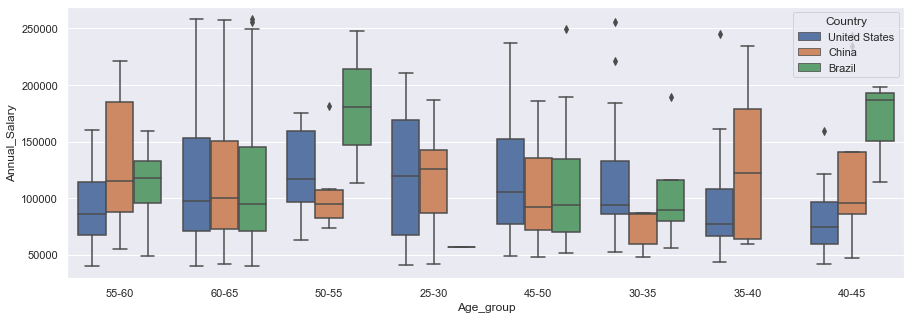

In [58]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='Age_group', y='Annual_Salary', hue='Country', data=df)

It can be seen that in the month of August and June there is a high concentration of high salaries, however for Julio Brazil usually hires with high salaries.

Se puede ver que en el mes de agosto y junio hay una alta concentración de sueldos altos, sin embargo para Julio Brazil suele contratar con altos sueldos.

Text(0.5, 0, 'Hire_Month')

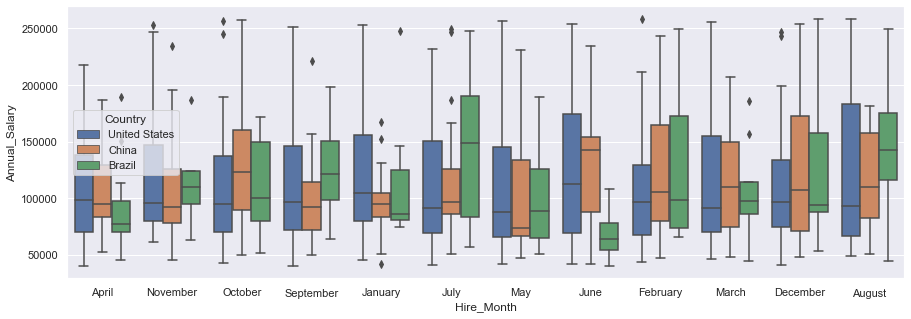

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='Hire_Month', y='Annual_Salary', hue='Country', data=df)
ax.set_xlabel("Hire_Month")

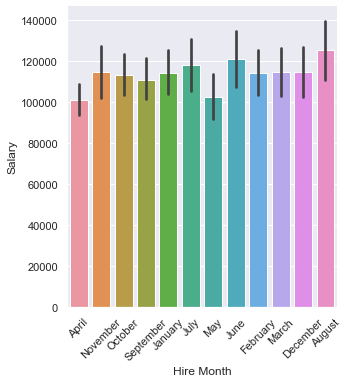

In [70]:
sns.catplot(x="Hire_Month", y="Annual_Salary", kind="bar", data=df)

plt.xlabel('Hire Month')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

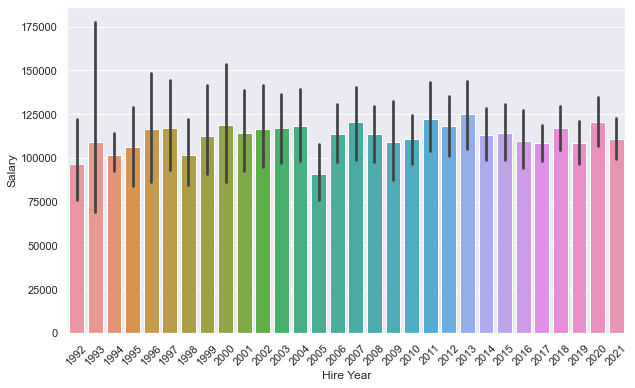

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="Hire_Year", y="Annual_Salary",data=df, ax=ax)

plt.xlabel('Hire Year')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

Here you can see those positions with higher bonuses such as Controls Engineer, Directors and Managers.

Aqui se pueden apreciar aquellas posiciones con mayores bonos como Controls Enginner, Directors y Managers.

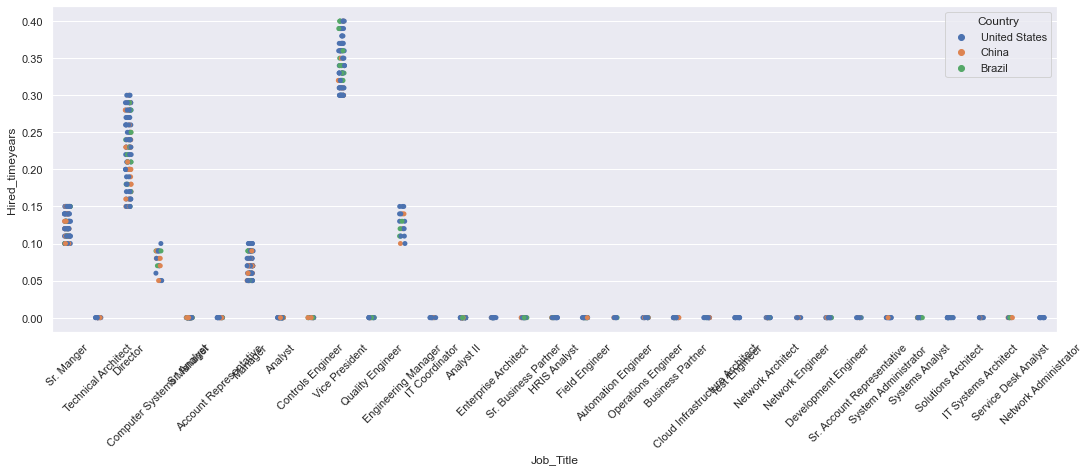

In [81]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.stripplot(x="Job_Title", y="Bonus", hue="Country", data=df, ax=ax)

plt.xlabel('Job_Title')
plt.ylabel('Hired_timeyears')
plt.xticks(rotation=45)

plt.show()